In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ETTh1.csv')
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [5]:
# to check unique values 
df.select_dtypes(include='object').nunique()

date    17420
dtype: int64

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
correlation_matrix=df.corr()

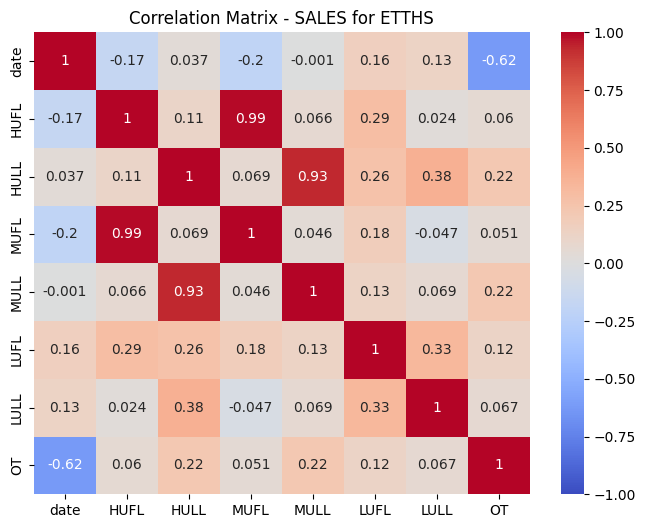

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Matrix - SALES for ETTHS')
plt.show()

In [ ]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = df, x = 'date', y = , hue = 'product', errorbar = None)
    
plt.title('Sales Over Time per Product', fontsize = 24, fontweight = 'bold')
plt.show()

In [5]:
df.set_index('date', inplace=True)

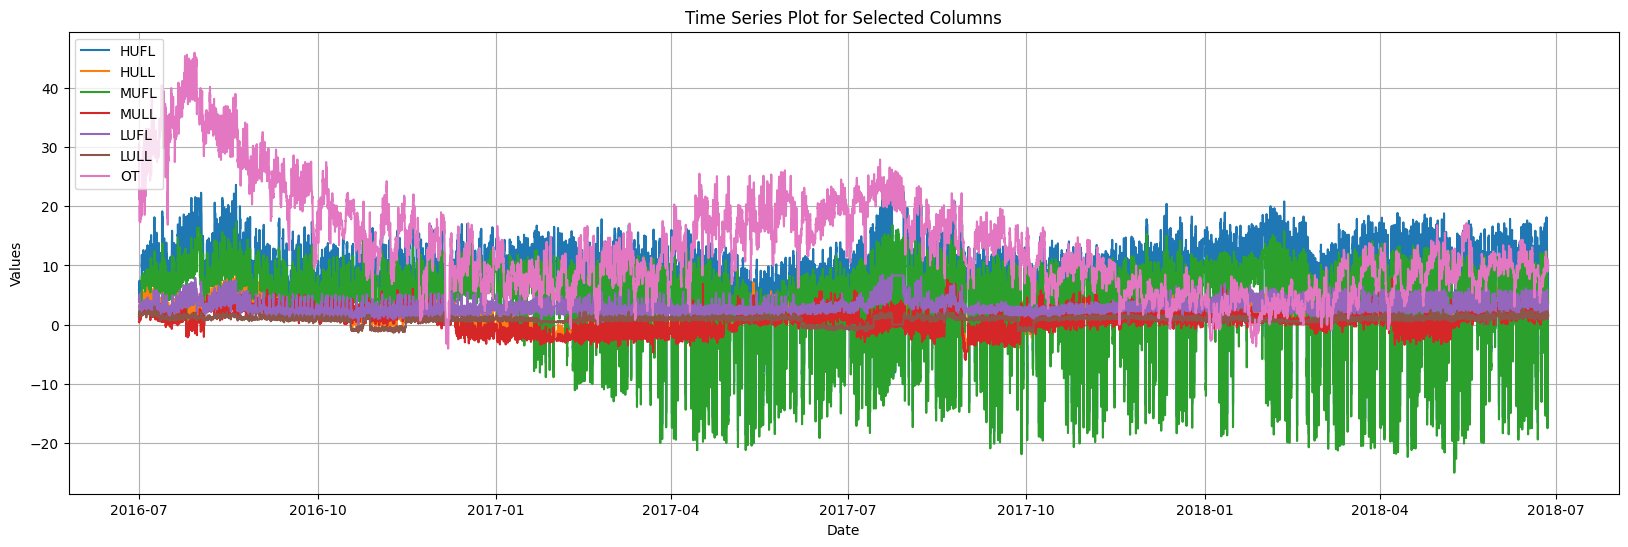

In [7]:
columns_to_plot= ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']
plt.figure(figsize=(20, 6))
for column in columns_to_plot:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot for Selected Columns')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

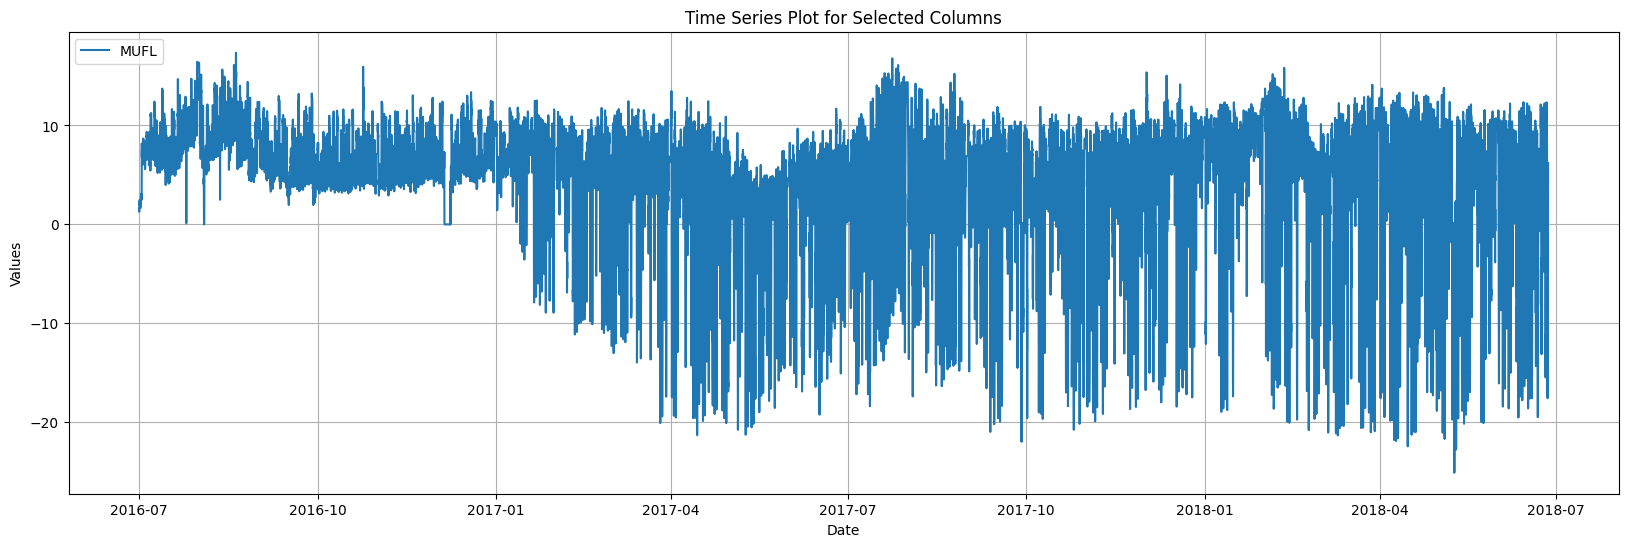

In [8]:
columns_to_plot= ['MUFL']
plt.figure(figsize=(20, 6))
for column in columns_to_plot:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot for Selected Columns')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [11]:
df_k = pd.read_csv('train.csv')
df_k

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


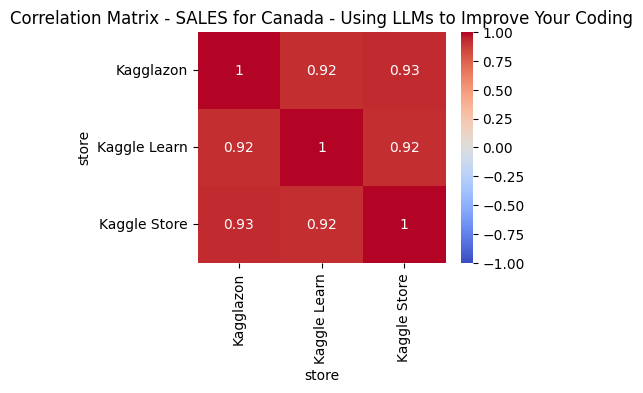

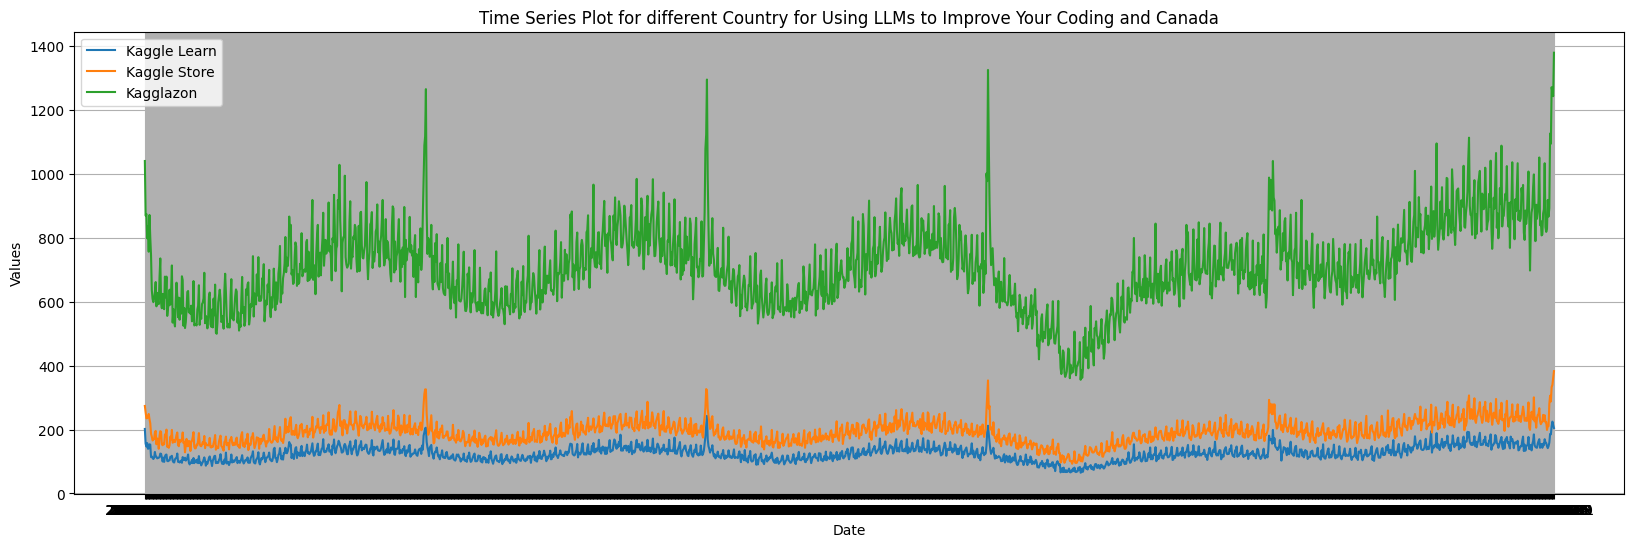

In [21]:
# Choose a specific 'STORE' and 'PRODUCT'
#store_name = 'Kaggle Learn'
product_name = 'Using LLMs to Improve Your Coding'
country_name = 'Canada'

# Filter the DataFrame for the selected 'STORE' and 'PRODUCT'
filtered_df = df_k[(df_k['country'] == country_name) & (df_k['product'] == product_name)]

# Create a pivot table to get the 'SALES' values for each country as columns
pivot_df = filtered_df.pivot_table(index='date', columns='store', values='num_sold')

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Matrix - SALES for {country_name} - {product_name}')
plt.show()

plt.figure(figsize=(20, 6))
for column in df_k['store'].unique():
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot for different Country for Using LLMs to Improve Your Coding and Canada')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


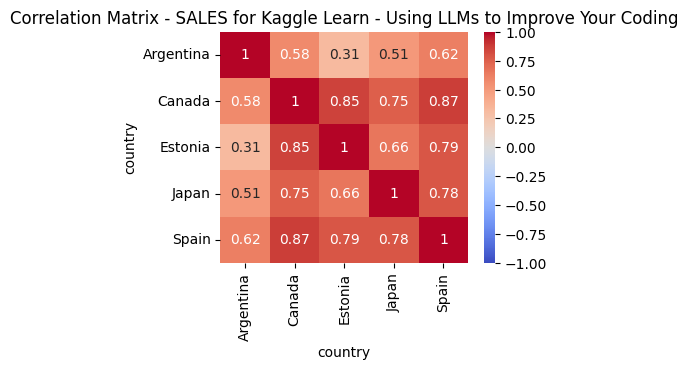

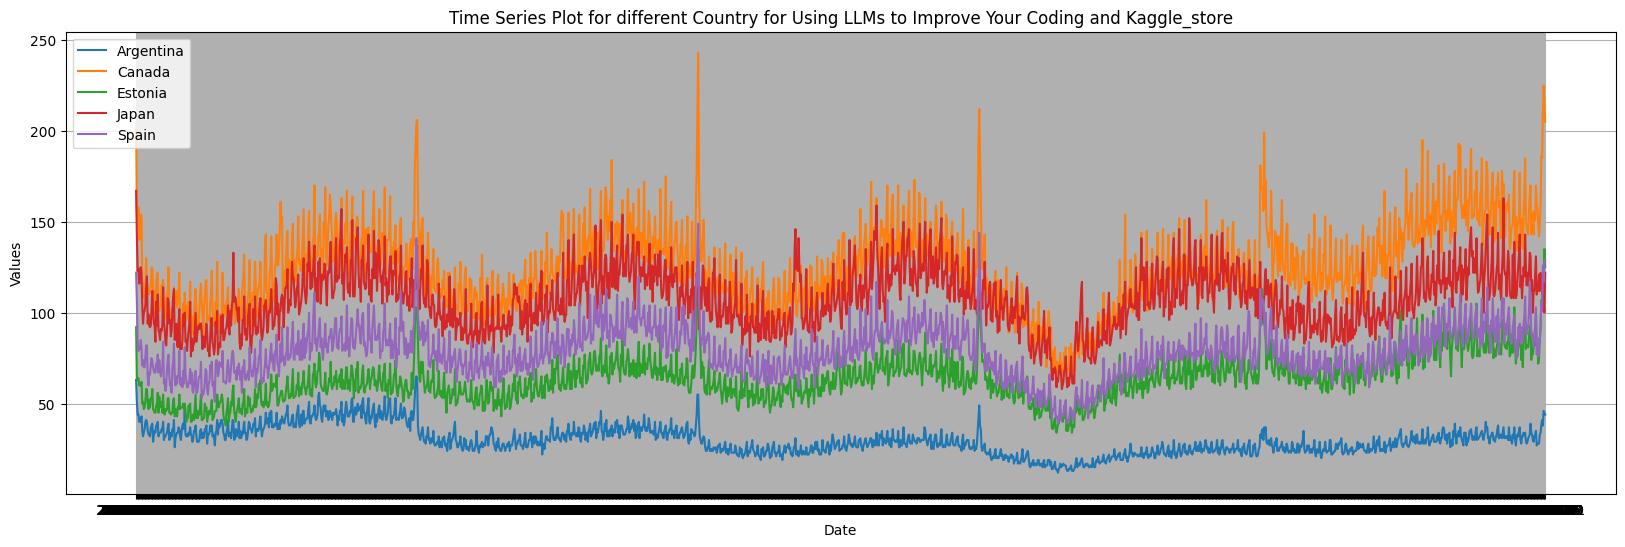

In [20]:
# Choose a specific 'STORE' and 'PRODUCT'
store_name = 'Kaggle Learn'
product_name = 'Using LLMs to Improve Your Coding'
#country_name = 'Argentina'

# Filter the DataFrame for the selected 'STORE' and 'PRODUCT'
filtered_df = df_k[(df_k['store'] == store_name) & (df_k['product'] == product_name)]

# Create a pivot table to get the 'SALES' values for each country as columns
pivot_df = filtered_df.pivot_table(index='date', columns='country', values='num_sold')

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Matrix - SALES for {store_name} - {product_name}')
plt.show()


plt.figure(figsize=(20, 6))
for column in df_k['country'].unique():
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot for different Country for Using LLMs to Improve Your Coding and Kaggle_store')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

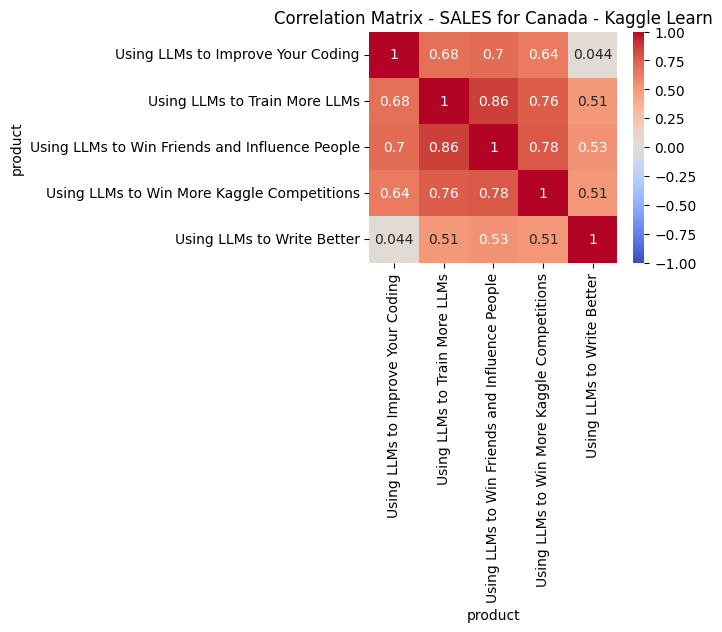

In [15]:
# Choose a specific 'STORE' and 'PRODUCT'
store_name = 'Kaggle Learn'
#product_name = 'Using LLMs to Improve Your Coding'
country_name = 'Canada'

# Filter the DataFrame for the selected 'STORE' and 'PRODUCT'
filtered_df = df_k[(df_k['country'] == country_name) & (df_k['store'] == store_name)]

# Create a pivot table to get the 'SALES' values for each country as columns
pivot_df = filtered_df.pivot_table(index='date', columns='product', values='num_sold')

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Matrix - SALES for {country_name} - {store_name}')
plt.show()

In [16]:
pivot_df

product,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
date,,,,,
2017-01-01,202,199,31,202,138
2017-01-02,156,150,26,158,123
2017-01-03,147,155,26,149,123
2017-01-04,158,169,24,137,113
2017-01-05,140,139,24,138,117
...,...,...,...,...,...
2021-12-27,185,183,29,183,137
2021-12-28,210,218,33,205,146
2021-12-29,225,231,35,232,179


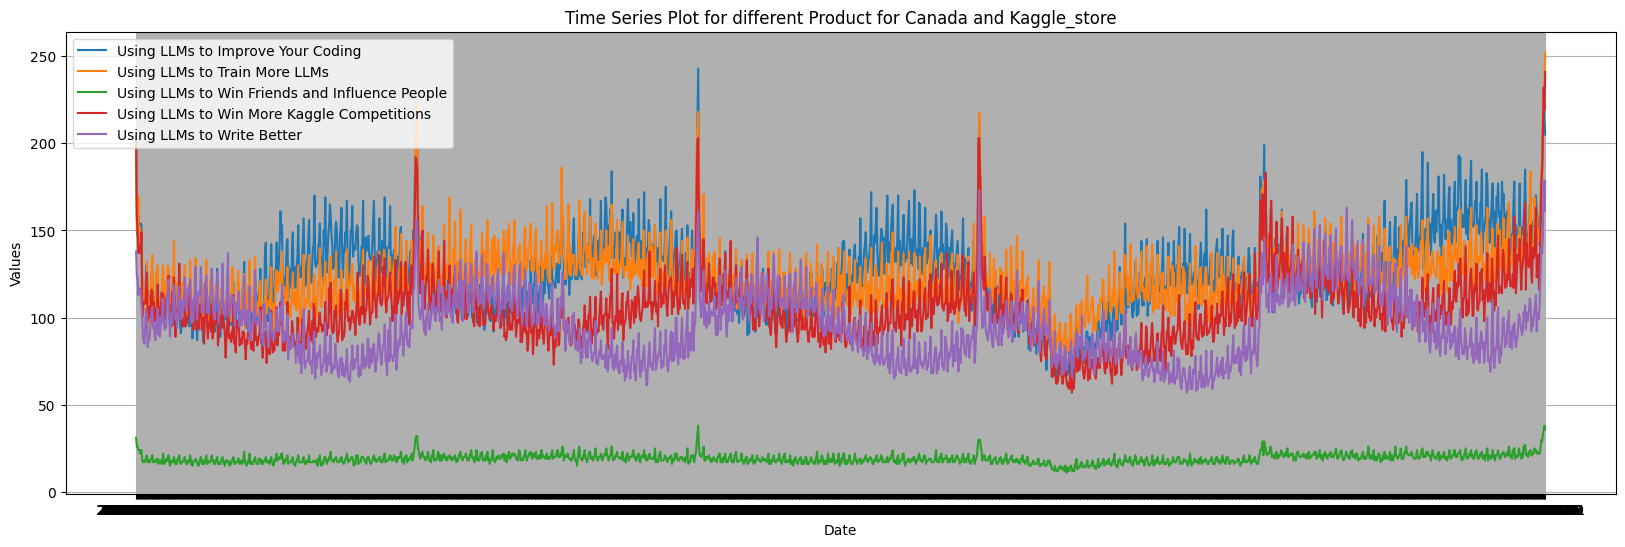

In [18]:
plt.figure(figsize=(20, 6))
for column in df_k['product'].unique():
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot for different Product for Canada and Kaggle_store')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

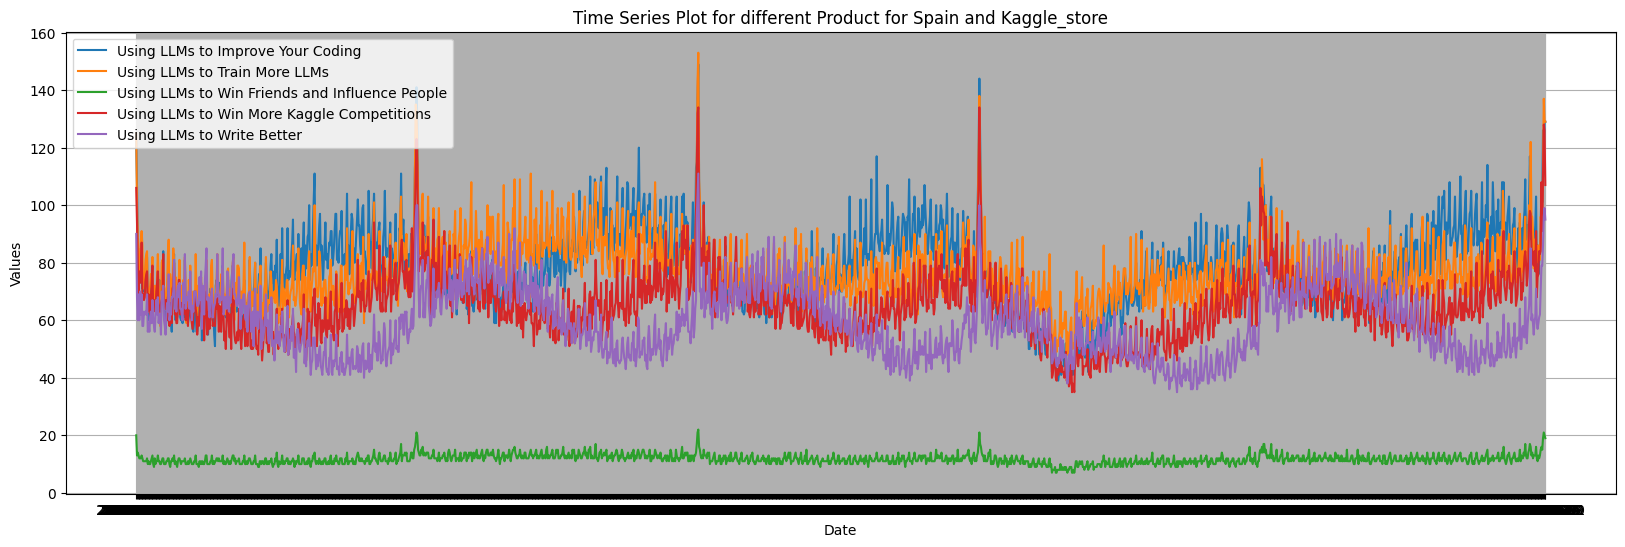

In [19]:
store_name = 'Kaggle Learn'
#product_name = 'Using LLMs to Improve Your Coding'
country_name = 'Spain'

# Filter the DataFrame for the selected 'STORE' and 'PRODUCT'
filtered_df = df_k[(df_k['country'] == country_name) & (df_k['store'] == store_name)]

# Create a pivot table to get the 'SALES' values for each country as columns
pivot_df = filtered_df.pivot_table(index='date', columns='product', values='num_sold')

plt.figure(figsize=(20, 6))
for column in df_k['product'].unique():
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot for different Product for Spain and Kaggle_store')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()